# Films Analysis
---


## Initial Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ignore warnings to make code more presentable
import warnings
warnings.filterwarnings('ignore')

# Make graphs appear below code
%matplotlib inline

In [2]:
# Load in the csv file of the data (created in the "data_cleanup.ipynb" file)
movie_data_to_load = "Output/new_movie_df_cleaned.csv"
new_movies_df = pd.read_csv(movie_data_to_load,index_col = 0)

## Critical Acclaim Score Versus Time Dependency Check

#### Background:
* The critical acclaim score used in the analysis depends on (1) quantity of film reviews, (2) average film review score, and (3) time since film release
* The analysis is restricted to only include films released after 2005. This ensures that films released during the internet age are not systematically rated higher than older films
* Film age is graphed relative to critical acclaim to observe whether or not film age impacts critical acclaim in this restricted sample

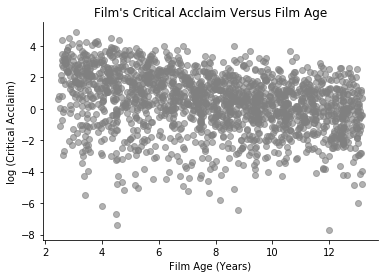

In [3]:
# Create scatter plot
plt.scatter(new_movies_df["Years Out"],np.log(new_movies_df["Critical Acclaim"]),color="grey",alpha=0.6)

# Format chart and create labels 
plt.xlabel("Film Age (Years)")
plt.ylabel("log (Critical Acclaim)")
plt.title("Film's Critical Acclaim Versus Film Age")
sns.despine()
# Show chart
plt.show()

#### Conclusion:
* The graph does not show a clear relationship between age and critical acclaim in films released after 2005
* It appears that restricting the analysis to newer films is an appropriate strategy

## Question 1:
#### Do profitable movies tend to have higher or lower average reviews than unprofitable movies?

In [4]:
# Create separate dataframes for films with positive and negative profits
profitable_movies = new_movies_df[new_movies_df["Profitability"]=="Profitable"]
not_profitable_movies = new_movies_df[new_movies_df["Profitability"]=="Not Profitable"]

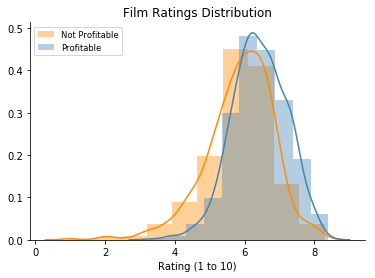

In [5]:
# Create a distribution plot to check that profitable and unprofitable films have normally distributed average ratings
sns.distplot(not_profitable_movies["Average Vote"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["Average Vote"], color = "steelblue",label = "Profitable", bins = 10)

# Formatting and labeling
plt.title("Film Ratings Distribution")
plt.xlabel("Rating (1 to 10)")
plt.legend(fontsize="small", loc = "upper left")
sns.despine()

# Show chart
plt.show()

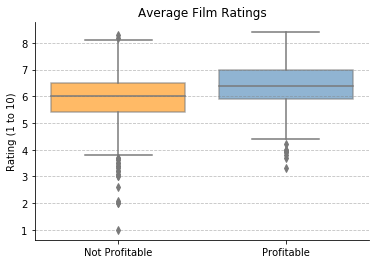

In [6]:
# Create boxplot in Seaborn (change opacity in matplotlib)
ratings_boxplot=sns.boxplot(x="Profitability",y="Average Vote",data=new_movies_df, palette="coolwarm", order=["Not Profitable","Profitable"], boxprops=dict(alpha=0.6))

# Change the facecolors to be consistent with the other charts
ratings_boxplot.artists[0].set_facecolor("darkorange")
ratings_boxplot.artists[1].set_facecolor("steelblue")

# Chart labels and formatting
plt.axes().yaxis.grid(True,color="grey",linestyle="--",alpha=0.5)
sns.despine()
plt.xlabel("")
plt.ylabel("Rating (1 to 10)")
plt.title("Average Film Ratings")

# Display the chart
plt.show()

In [7]:
# Check variances of average review scores of both profitable and unprofitable films
{"Unprofitable Film Rating Standard Deviation":(np.std(not_profitable_movies["Average Vote"])),"Profitable Film Rating Standard Deviation":(np.std(profitable_movies["Average Vote"]))}

{'Unprofitable Film Rating Standard Deviation': 0.97482414860796,
 'Profitable Film Rating Standard Deviation': 0.7806651395700555}

In [8]:
# Use t-test to test for differences in film average review since variances are similar
stats.ttest_ind(not_profitable_movies["Average Vote"],profitable_movies["Average Vote"], axis=None, equal_var = True)

Ttest_indResult(statistic=-13.141468997014659, pvalue=9.316350019183919e-38)

In [9]:
# Verify using Welch's test
stats.ttest_ind(not_profitable_movies["Average Vote"],profitable_movies["Average Vote"], axis=None, equal_var = False)

Ttest_indResult(statistic=-12.312227793124244, pvalue=1.0288103803785004e-32)

#### Assumptions Checks:
* The distribution plot of the average review scores of both unprofitable and profitable movies shows that both groups have approximately normally distributed average review scores
* The variances of the review scores of both groups are relatively similar
* There is not a compelling reason to expect that profitable or unprofitable movies will have higher or lower average review scores than each other
* Since both groups' average review scores are close to being normally distributed, the variances of both groups' average review scores are similar, and there is not a compelling reason to anticipate one of the two groups having a higher average score than the other, a two-tailed two-sample t-test should be used

#### Conclusion
* The two-tailed two-sample t-test yields statistically significant results at the 95% confidence level (p-value less than 0.025)
* Welch's test also yields a statistically significant result
* On average, profitable movies have higher average review scores than unprofitable movies


## Question 2:
#### Do profitable movies tend to have higher or lower budgets than unprofitable movies?

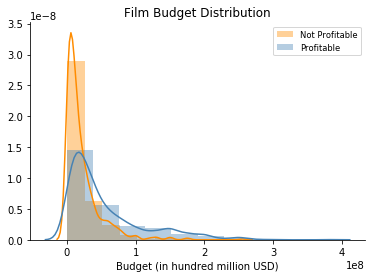

In [10]:
# BUDGET DISTRIBUTION CHART

# Create a distribution plot to check that profitable and unprofitable films have normally distributed budgets
sns.distplot(not_profitable_movies["Budget"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["Budget"], color = "steelblue",label = "Profitable", bins = 10)

# Formatting
plt.title("Film Budget Distribution")
plt.xlabel("Budget (in hundred million USD)")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()

# Show chart
plt.show()

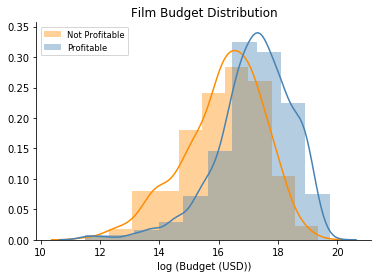

In [11]:
# LOG BUDGET DISTRIBUTION CHART

# Create a distribution plot to check that profitable and unprofitable films have normally distributed budgets
sns.distplot(not_profitable_movies["log Budget"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["log Budget"], color = "steelblue",label = "Profitable", bins = 10)

# Formatting
plt.title("Film Budget Distribution")
plt.xlabel("log (Budget (USD))")
plt.legend(fontsize="small", loc = "upper left")
sns.despine()

# Show chart
plt.show()

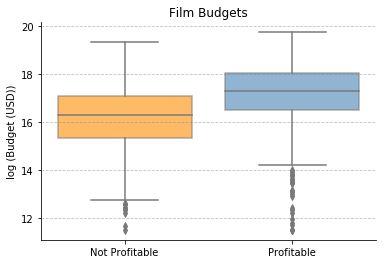

In [12]:
# BOXPLOT COMPARING LOG BUDGET OF PROFITABLE AND UNPROFITABLE FILMS

# Create boxplot in Seaborn (change opacity in matplotlib)
budget_boxplot= sns.boxplot(x="Profitability",y="log Budget",data=new_movies_df,palette="coolwarm",order=["Not Profitable","Profitable"], boxprops=dict(alpha=0.6))

# Change the facecolors to be consistent with the other charts
budget_boxplot.artists[0].set_facecolor("darkorange")
budget_boxplot.artists[1].set_facecolor("steelblue")

# Chart labels and formatting
plt.axes().yaxis.grid(True,color="grey",linestyle="--",alpha=0.5)
sns.despine()
plt.xlabel("")
plt.ylabel("log (Budget (USD))")
plt.title("Film Budgets")

# Display the chart
plt.show()

In [13]:
# Check variances of log (Budget) for both profitable and unprofitable films
{"Unprofitable Film log Budget Standard Deviation":(np.std(not_profitable_movies["log Budget"])),"Profitable Film log Budget Standard Deviation":(np.std(profitable_movies["log Budget"]))}

{'Unprofitable Film log Budget Standard Deviation': 1.3563021710575953,
 'Profitable Film log Budget Standard Deviation': 1.2911191097939394}

In [14]:
# Use two-tailed two-sample t-test since variances are similar
stats.ttest_ind(not_profitable_movies["log Budget"],profitable_movies["log Budget"], axis=None, equal_var = True)

Ttest_indResult(statistic=-15.954275864734552, pvalue=9.618335729783545e-54)

In [15]:
# Verify result of above t-test using Welch's test
stats.ttest_ind(not_profitable_movies["log Budget"],profitable_movies["log Budget"], axis=None, equal_var = False)

Ttest_indResult(statistic=-15.720808229923335, pvalue=5.475089079072883e-51)

#### Assumptions Checks:
* Judging from the distribution plot of the budgets of both profitable and unprofitable movies, it appears that both groups have right-skewed budget distributions
* When a logarithmic transformation is applied to the budget metric, the distributions of both unprofitable and profitable film budgets get closer to normal distributions
* The variances of the log budgets of both groups are relatively similar
* There is not a compelling reason to expect that profitable or unprofitable movies will have higher or lower budgets than the other group
* Since the logarithmically-transformed data of both groups (profitable and unprofitable films) is close to being normally distributed, the variances of both groups' log budgets are similar, and there is not a compelling reason to anticipate one of the two groups having a higher log budget than the other, a two-tailed two-sample t-test should be used

#### Conclusion
* The two-tailed two-sample t-test yields statistically significant results at the 95% confidence level (p-value less than 0.025)
* Welch's test also yields a statistically significant result
* On average, profitable movies have higher budgets than unprofitable movies

## Question 3:
#### Does film budget impact level of critical acclaim?

#### Answer question 3 for all movies as a whole

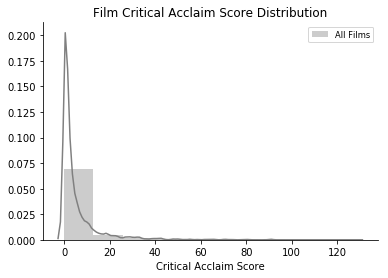

In [16]:
# CRITICAL ACCLAIM SCORE DISTRIBUTION CHART (ALL MOVIES)

# Create a distribution plot to check that films have normally distributed critical acclaim scores
sns.distplot(new_movies_df["Critical Acclaim"], color = "grey", label = "All Films", bins = 10)

# Chart labels and formatting
plt.title("Film Critical Acclaim Score Distribution")
plt.xlabel("Critical Acclaim Score")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()

# Display the chart
plt.show()

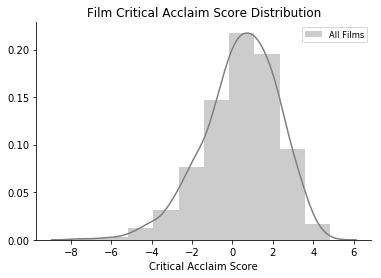

In [17]:
# LOG CRITICAL ACCLAIM SCORE DISTRIBUTION CHART (ALL MOVIES)

# Create a distribution plot to check that films have normally distributed log critical acclaim scores
sns.distplot(new_movies_df["log Critical Acclaim"], color = "grey", label = "All Films", bins = 10)

# Chart labels and formatting
plt.title("Film Critical Acclaim Score Distribution")
plt.xlabel("Critical Acclaim Score")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()

# Display the chart
plt.show()

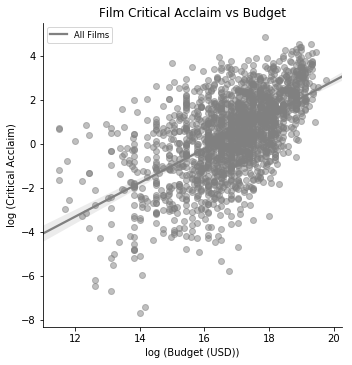

In [18]:
# Create a scatter plot to check if log budget impacts log critical acclaim
sns.lmplot(x="log Budget", y="log Critical Acclaim",data=new_movies_df,legend=True,scatter_kws={'alpha':0.5,"color":"grey","label":"All Films"},line_kws={"color":"grey","label":"All Films"})

# Chart labels and formatting
plt.xlabel("log (Budget (USD))")
plt.ylabel("log (Critical Acclaim)")
plt.title("Film Critical Acclaim vs Budget")
plt.legend(fontsize="small", loc = "upper left")

# Display the chart
plt.show()

In [19]:
# Define variables to be used in regression analysis
x_values = new_movies_df["log Budget"].values
y_values = new_movies_df["log Critical Acclaim"].values
n = len(x_values)

In [20]:
# REGRESSION ANALYSIS (ALL MOVIES)

# Cannot use Rank 1 matrix in scikit learn so reshaping
x_values = x_values.reshape((n,1))

# Create model
reg = LinearRegression()

# Fit data
reg_all = reg.fit(x_values,y_values)

# Y prediction
y_pred = reg_all.predict(x_values)

# Calculate RMSE, R2 score, intercept, and coefficient
mse = mean_squared_error(y_values,y_pred)
rmse = np.sqrt(mse)
r2_score = reg_all.score(x_values,y_values)
intercept = reg_all.intercept_
coefficient= reg_all.coef_[0]

# Display findings
print("All Films Regression Results:")
print("----------------------------")
print(f"The y-intercept is: {reg_all.intercept_}")
print(f"The log of budget variable's coefficient is: {coefficient}")
print(f"The R-squared value for the model is: {r2_score}")

All Films Regression Results:
----------------------------
The y-intercept is: -12.559200673923037
The log of budget variable's coefficient is: 0.7701344092119866
The R-squared value for the model is: 0.33894439194648845


#### Assumptions Check:
* Judging from the distribution plot of the critical acclaim scores, it appears that critical acclaim scores are right-skewed
* When a logarithmic transformation is applied to the critical acclaim scores, the distribution of scores gets closer to a normal distribution
* The logarithmically-transformed data is used in the regression analysis

#### Conclusion
* The single variable linear regression reveals that film budget has a statistically significant impact on critical acclaim
* The log of budget's coefficient of 0.77 means that a 10% increase in a film's budget is associated with a 7.7% increase in the film's critical acclaim score
* The resulting R-squared value means that the single-variable regression model explains about 34% of the variation in critical acclaim scores

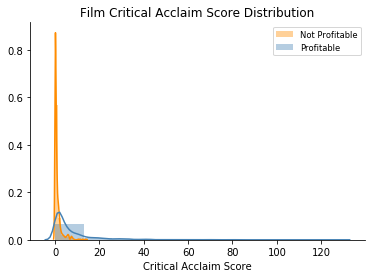

In [22]:
# CRITICAL ACCLAIM SCORE DISTRIBUTION CHART (PROFITABLE AND UNPROFITABLE MOVIES)

# Create a distribution plot to check that profitable and unprofitable films have normally distributed critical acclaim scores
sns.distplot(not_profitable_movies["Critical Acclaim"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["Critical Acclaim"], color = "steelblue",label = "Profitable", bins = 10)

# Chart labels and formatting
plt.title("Film Critical Acclaim Score Distribution")
plt.xlabel("Critical Acclaim Score")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()

# Display the chart
plt.show()

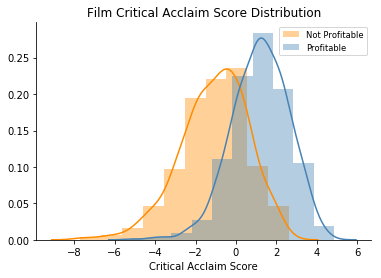

In [23]:
# LOG CRITICAL ACCLAIM SCORE DISTRIBUTION CHART (PROFITABLE AND UNPROFITABLE MOVIES)

# Create a distribution plot to check that films have normally distributed log critical acclaim scores
sns.distplot(not_profitable_movies["log Critical Acclaim"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["log Critical Acclaim"], color = "steelblue",label = "Profitable", bins = 10)

# Chart labels and formatting
plt.title("Film Critical Acclaim Score Distribution")
plt.xlabel("Critical Acclaim Score")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()

# Display the chart
plt.show()

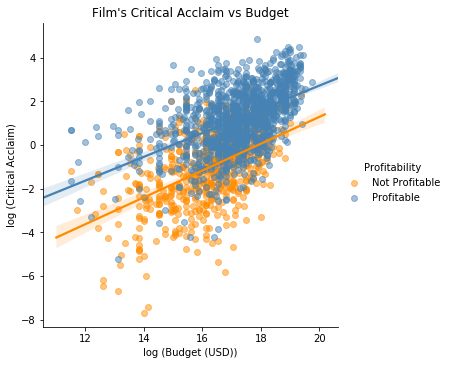

In [24]:
sns.lmplot(x="log Budget", y="log Critical Acclaim",hue = "Profitability",data=new_movies_df,scatter_kws={'alpha':0.5},hue_order=["Not Profitable","Profitable"],palette={"Not Profitable" : "darkorange","Profitable" : "steelblue"})
plt.xlabel("log (Budget (USD))")
plt.ylabel("log (Critical Acclaim)")
plt.title("Film's Critical Acclaim vs Budget")
plt.show()

In [25]:
x_profitable = profitable_movies["log Budget"].values
y_profitable = profitable_movies["log Critical Acclaim"].values
n_profitable = len(x_profitable)

In [26]:
# Cannot use Rank 1 matrix in scikit learn so we're reshaping
x_profitable = x_profitable.reshape((n_profitable,1))

# Fitting data
reg_profitable = reg.fit(x_profitable,y_profitable)
# Y prediction
y_pred_profitable = reg_profitable.predict(x_profitable)

# Calculate RMSE and R2 score
mse_profitable = mean_squared_error(y_profitable,y_pred_profitable)
rmse_profitable = np.sqrt(mse_profitable)
r2_score_profitable = reg_profitable.score(x_profitable,y_profitable)
intercept_profitable = reg_profitable.intercept_
coefficient_profitable = reg_profitable.coef_[0]

# Display findings
print("Profitable Films Regression Results:")
print("-----------------------------------")
print(f"The y-intercept is: {intercept_profitable}")
print(f"The log of budget variable's coefficient is: {coefficient_profitable}")
print(f"The R-squared value for the model is: {r2_score_profitable}")

Profitable Films Regression Results:
-----------------------------------
The y-intercept is: -8.157369340682166
The log of budget variable's coefficient is: 0.5441638394487825
The R-squared value for the model is: 0.24782363323670567


In [27]:
# The statistically-significant log of budget coefficient means that a 10% increase in a profitable film's budget is associated with a 5.4% increase in the profitable film's critical acclaim score
# The resulting R-squared value means that the single-variable regression model explains about 25% of the variation in profitable film critical acclaim scores

In [28]:
x_unprofitable = not_profitable_movies["log Budget"].values
y_unprofitable = not_profitable_movies["log Critical Acclaim"].values
n_unprofitable = len(x_unprofitable)

In [29]:
# Cannot use Rank 1 matrix in scikit learn so we're reshaping
x_unprofitable = x_unprofitable.reshape((n_unprofitable,1))

# Fitting data
reg_unprofitable = reg.fit(x_unprofitable,y_unprofitable)
# Y prediction
y_pred_unprofitable = reg_unprofitable.predict(x_unprofitable)

# Calculate RMSE and R2 score
mse_unprofitable = mean_squared_error(y_unprofitable,y_pred_unprofitable)
rmse_unprofitable = np.sqrt(mse_unprofitable)
r2_score_unprofitable = reg_unprofitable.score(x_unprofitable,y_unprofitable)
intercept_unprofitable = reg_unprofitable.intercept_
coefficient_unprofitable = reg_unprofitable.coef_[0]

# Display findings
print("Unprofitable Films Regression Results:")
print("-------------------------------------")
print(f"The y-intercept is: {intercept_unprofitable}")
print(f"The log of budget variable's coefficient is: {coefficient_unprofitable}")
print(f"The R-squared value for the model is: {r2_score_unprofitable}")

Unprofitable Films Regression Results:
-------------------------------------
The y-intercept is: -11.001342794544602
The log of budget variable's coefficient is: 0.614714847975924
The R-squared value for the model is: 0.24785121319214232


In [30]:
# The statistically-significant log of budget coefficient means that a 10% increase in a profitable film's budget is associated with a 6.1% increase in the unprofitable film's critical acclaim score
# The resulting R-squared value means that the single-variable regression model explains about 25% of the variation in unprofitable film critical acclaim scores